# Image Processing I

## Template Matching by Correlation

### Convolution vs Correlation
<img src="i/corr1.png" width=800>

### Example
<img src="i/corr2.png" width=800>

### Normalized Correlation
<img src="i/corr3.png" width=800>

## References 
- [Template Matching by Correlation](https://youtu.be/1_hwFc8PXVE)
- [ OpenCV Template Matching Tutorial](https://docs.opencv.org/4.x/d4/dc6/tutorial_py_template_matching.html)
- [First Principles of Computer Vision Monographs](https://fpcv.cs.columbia.edu/Monographs)


In [ ]:
import numpy as np
import cv2 as cv

from matplotlib import pyplot as plt
from matplotlib import patches

%matplotlib inline
import files_management

In [ ]:
f = files_management.read_left_image()

# create a 2D convolution mask (aka 2D filter)
# we make a Gaussian 2D filter with size = (21, 21)

# First create a 1D convolution mask
h1 = cv.getGaussianKernel(21, 0)

# create a 2D convolution mask 
h = h1.dot(h1.T)

# convolve f with h, f*h
g = cv.filter2D(f, ddepth=-1, kernel=h)

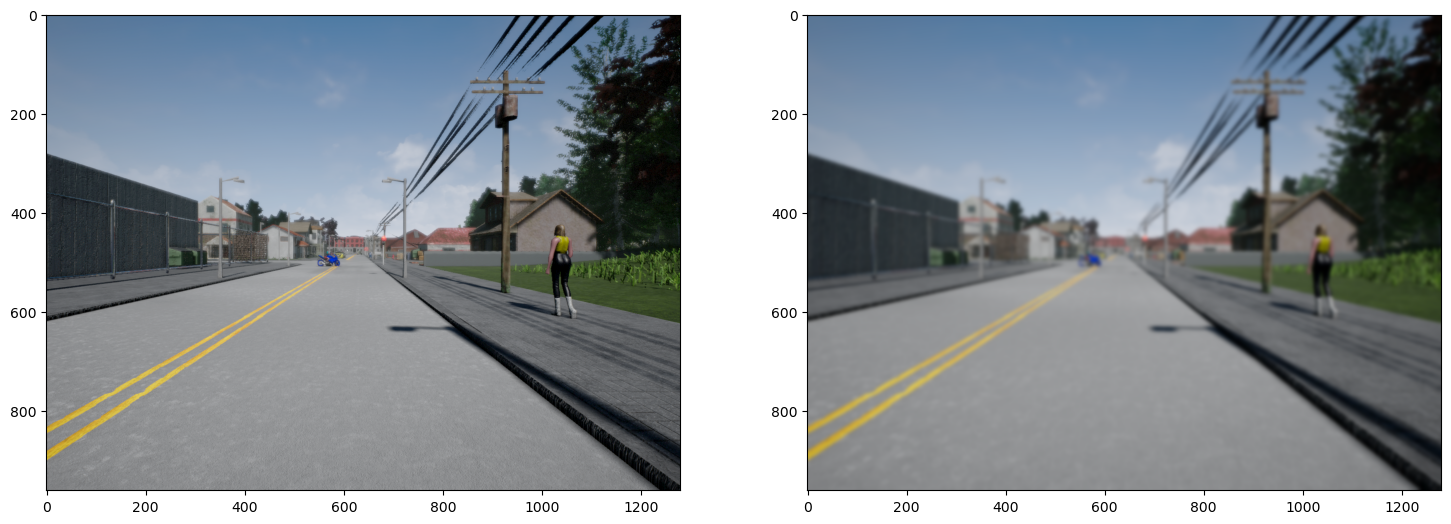

In [ ]:
_, qlayout = plt.subplots(1, 2, figsize=(18, 18), width_ratios=[1, 1])
qlayout[0].imshow(f)
qlayout[1].imshow(g)
plt.show()

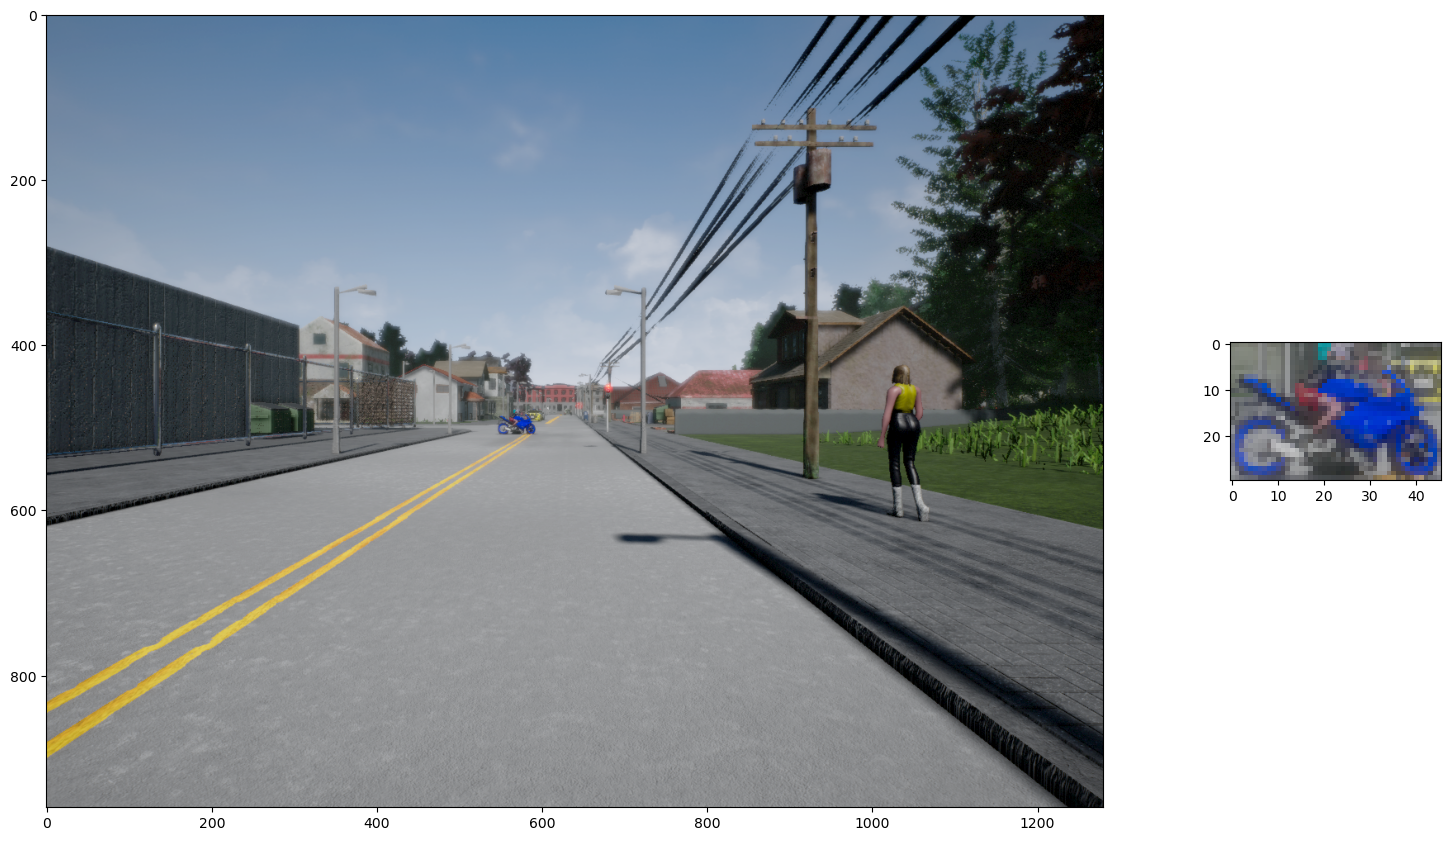

In [36]:
t = files_management.get_obstacle_image()

_, qlayout = plt.subplots(1, 2, figsize=(18, 18), width_ratios=[5, 1])
qlayout[0].imshow(f)
qlayout[1].imshow(t)
plt.show()

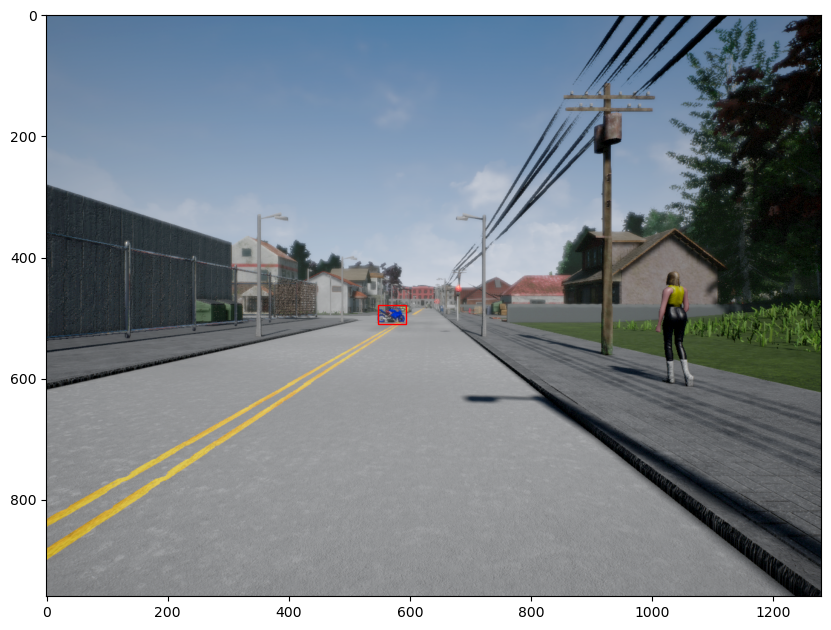

In [ ]:
def match(f, t):
    f = cv.cvtColor(f, cv.COLOR_BGR2GRAY)
    t = cv.cvtColor(t, cv.COLOR_BGR2GRAY)
    h, w = t.shape

    res = cv.matchTemplate(f, t, cv.TM_CCOEFF_NORMED)
    _, _, _, top_left = cv.minMaxLoc(res)

    return top_left, w, h

top_left, w, h = match(f, t)
obox = patches.Rectangle(top_left, w, h, linewidth=1, edgecolor='r', facecolor='none')

_, ax = plt.subplots(1, figsize=(10, 10))
ax.imshow(f)
ax.add_patch(obox)
plt.show()